In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, kruskal # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)
from scipy.stats import levene # Test variance
from scipy.stats import ks_2samp

from statsmodels.graphics.gofplots import qqplot

# Aerofit

In [2]:
df_aerofit = pd.read_csv("aerofit.csv")

In [3]:
df_aerofit.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [4]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

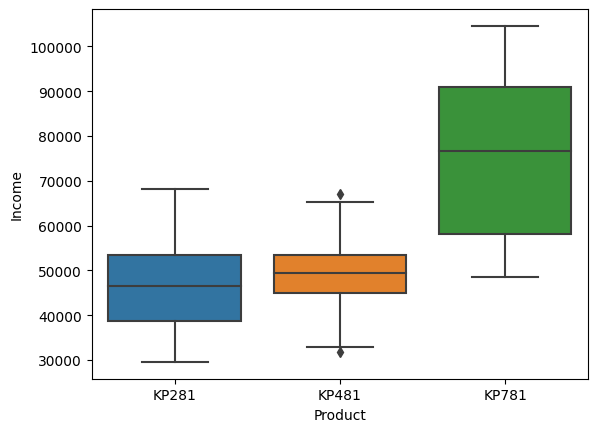

In [5]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [6]:
df_aerofit["random_group"] = np.random.choice(
    ["g1", "g2", "g3"], 
    size=len(df_aerofit)
)

In [7]:
df_aerofit.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   KP281   18    Male         14        Single      3        4   29562   
1   KP281   19    Male         15        Single      2        3   31836   
2   KP281   19  Female         14     Partnered      4        3   30699   
3   KP281   19    Male         12        Single      3        3   32973   
4   KP281   20    Male         13     Partnered      4        2   35247   

   Miles random_group  
0    112           g3  
1     75           g2  
2     66           g1  
3     85           g2  
4     47           g2

<Axes: xlabel='random_group', ylabel='Income'>

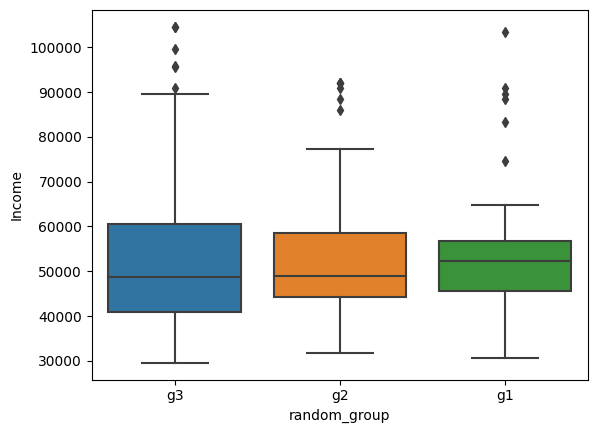

In [8]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

In [9]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [10]:
income_g1.mean()

54000.8679245283

In [11]:
income_g2.mean()

52970.23880597015

In [12]:
income_g3.mean()

54307.86666666667

In [13]:
# H0: All groups have same mean
# Ha: One or more groups have different mean
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


<Axes: xlabel='Product', ylabel='Income'>

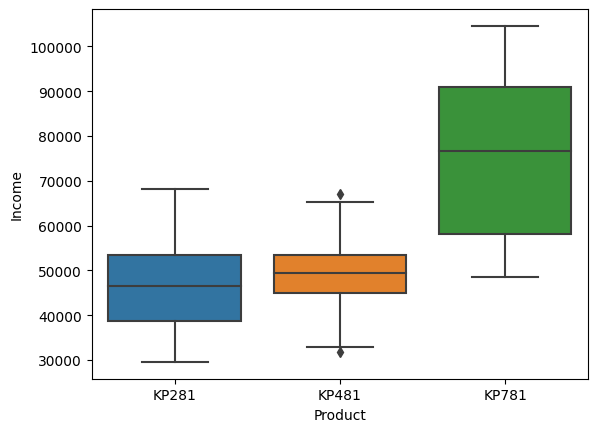

In [14]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [15]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [16]:
income_kp281.mean()

46418.025

In [17]:
income_kp481.mean()

48973.65

In [18]:
income_kp781.mean()

75441.575

In [19]:
# H0: All groups have same mean
f_oneway(income_kp281, income_kp481, income_kp781)

# p_value is almost 0, so reject H0

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [6]:
# H0: All groups have same mean
f_oneway([9.7, 9.5, 7.6 , 6.8, 6.7, 6.7, 6.6, 4.6, 3.9, 3.9, 3.7, 3.3, 3.0, 0.8, -9.9],  [6.5, 6.4, 6.4, 6.2, 4.9, 4.6, 4.6, 4.2, 3.6, 3.2, 2.9, 2.8, 2.7, 2.5])

# p_value is almost 0, so reject H0

F_onewayResult(statistic=0.002619189947196207, pvalue=0.9595604170457732)

In [20]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

7.770191623361236e-16
Reject H0


In [21]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.116508528877672e-21
Reject H0


# Assumptions of ANOVA

1. Gaussian
2. Independent
3. Equal variance

In [22]:
# If assumptions of ANOVA fail, use kruskal
kruskal(income_kp281, income_kp481, income_kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

In [23]:
kruskal(income_g1, income_g2, income_g3)

KruskalResult(statistic=0.8959073688214003, pvalue=0.6389342759641421)

In [24]:
df_hw = pd.read_csv("weight-height.csv")

In [25]:
df_hw.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [26]:
height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

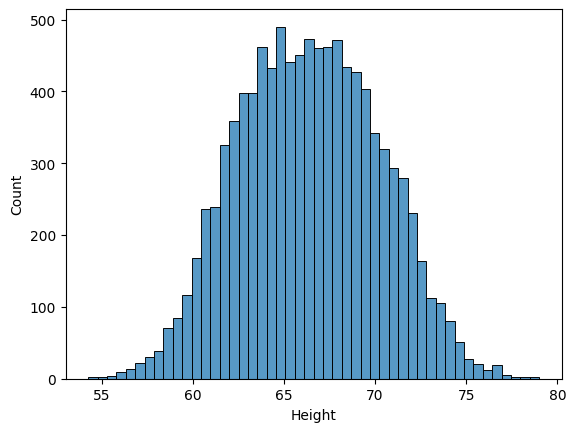

In [27]:
sns.histplot(height)

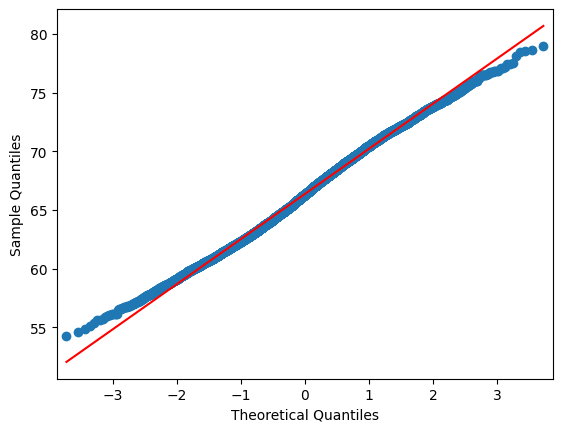

In [28]:
qqplot(height, line="s")
plt.show()

In [29]:
df_wt = pd.read_csv("waiting_time.csv")

In [30]:
df_wt.head()

time
0  184.003075
1   36.721521
2   29.970417
3   75.640285
4   61.489439

<Axes: xlabel='time', ylabel='Count'>

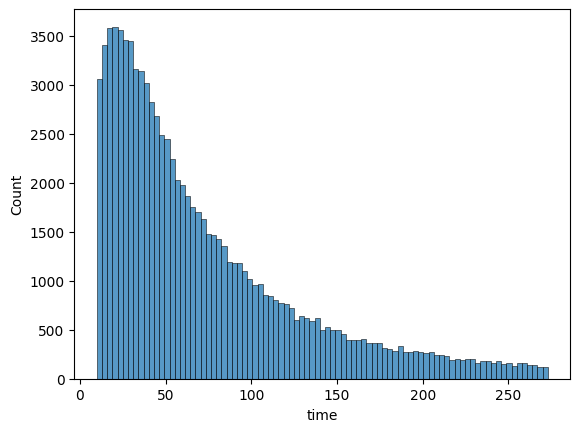

In [31]:
sns.histplot(df_wt["time"])

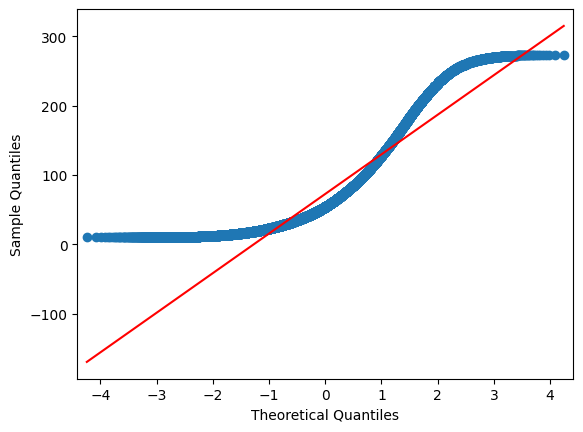

In [32]:
qqplot(df_wt["time"], line="s")
plt.show()

## Shapiro test for Gaussian


Take a few samples of data (50 to 200)
This test may not work if data is too large

In [33]:
height_subset = height.sample(100)

In [34]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.2351693958044052


In [35]:
df_wt_subset = df_wt.sample(50)["time"]

In [36]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

2.2358437945513288e-06


<Axes: xlabel='Height', ylabel='Count'>

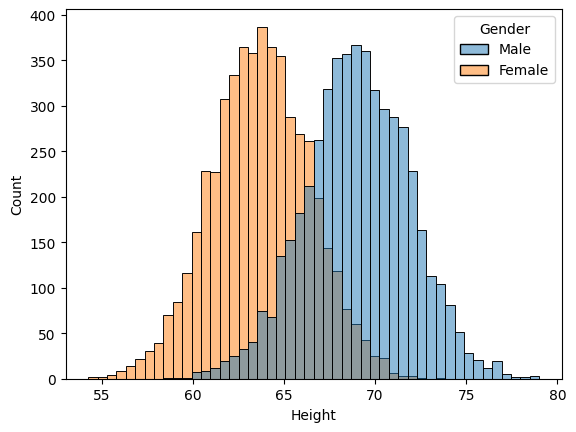

In [37]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [38]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [39]:
height_men.mean()

69.02634590621741

In [40]:
height_women.mean()

63.70877360342507

In [41]:
ttest_ind(height_men, height_women)

TtestResult(statistic=95.60271449148823, pvalue=0.0, df=9998.0)

In [42]:
height_men.var()

8.198843252520467

In [43]:
height_women.var()

7.2699474936701245

To establish whether this difference we see in variance is chance or significant, we have to use Levene test

In [44]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


In [5]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene([9.7, 9.5, 7.6 , 6.8, 6.7, 6.7, 6.6, 4.6, 3.9, 3.9, 3.7, 3.3, 3.0, 0.8, -9.9],  [6.5, 6.4, 6.4, 6.2, 4.9, 4.6, 4.6, 4.2, 3.6, 3.2, 2.9, 2.8, 2.7, 2.5])
if p_value < 0.2:
    print("Variances are not equal")
else:
    print("Variances are equal")
levene_stat, p_value

Variances are not equal


(3.2465822074440966, 0.08274976336015857)

# Optional Post read - ANOVA implementation 

Suppose we have monthly iPhone sales from three stores in a city: a, b, c.

Test whether they have the same average sales

In [45]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]

In [46]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

0.2348993288590604 0.793504662732833


In [47]:
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

A   B   C
0  25  30  18
1  25  30  30
2  27  21  29
3  30  24  29
4  23  26  24
5  20  28  26

In [48]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

Average sales for A: 25.0
Average sales for B: 26.5
Average sales for C: 26.0


In [49]:
m = (m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


In [50]:
SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


In [51]:
MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [52]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)
    
SSw = np.sum(ssw)

In [53]:
MSw = SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [54]:
F = MSb/MSw
print('F-score: {}'.format(F))

F-score: 0.23489932885906037


In [55]:
1 - f.cdf(F, dfn=2, dfd=15)

NameError: name 'f' is not defined

In [ ]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

In [ ]:
# If assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal(a, b, c)